In [79]:
from pyit2fls import IT2FS, tri_mf, const_mf, rtri_mf, ltri_mf, \
    trapezoid_mf, IT2Mamdani, IT2FS_plot, min_t_norm, max_s_norm, \
    TR_plot, crisp
from numpy import linspace
import pandas as pd
import numpy as np

In [81]:
df_data = pd.read_excel('CTG.xlsx', sheet_name="Data", header=1)
df_data = df_data[0:-3]
df_data=df_data.set_index(np.arange(2126)+1)

df = pd.read_excel('CTG.xlsx', sheet_name="Raw Data")
df = df[1:-3] # delete empty rows
df = df.drop(['FileName'], axis=1) # delete FileName column
df = df.drop(['SegFile'], axis=1) # delete SegFile column
df = df.drop(['LBE'], axis=1) # delete LBE column (repeated LB column)
df = df.drop(['DR'], axis=1) # delete DR column (everything is zero)
a= df_data['AC.1']
df['AC'] = df_data['AC.1']
df['FM'] = df_data['FM.1']
df['UC'] = df_data['UC.1']
df['DL'] = df_data['DL.1']
df['DS'] = df_data['DS.1']
df['DP'] = df_data['DP.1']

df = df[['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV', 'MLTV',  'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 
         'Median', 'Variance', 'Tendency', 'CLASS', 'NSP']]

df['Nmax'] = df['Nmax'].astype(int)
df['Nzeros'] = df['Nzeros'].astype(int)
df['CLASS'] = df['CLASS'].astype(int)
df['NSP'] = df['NSP'].astype(int)

df = df[['ALTV', 'Variance', 'ASTV', 'NSP']]
df.head()

,ALTV,Variance,ASTV,NSP
1,43.0,73.0,73.0,2
2,0.0,12.0,17.0,1
3,0.0,13.0,16.0,1
4,0.0,13.0,16.0,1
5,0.0,11.0,16.0,1


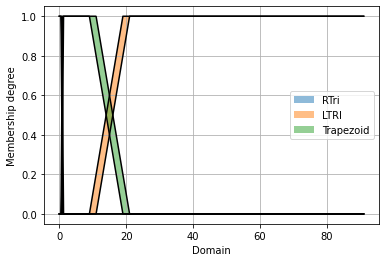

In [70]:
ALTV_domain = linspace(0, 91, 1001)
ALTV_RTri = IT2FS(ALTV_domain, 
             rtri_mf, [1.25, 0.75, 1], 
             rtri_mf, [1, 0.5, 1], check_set=True)
ALTV_LTri = IT2FS(ALTV_domain, 
             ltri_mf, [9, 19, 1], 
             ltri_mf, [11, 21, 1], check_set=True)
ALTV_Trapezoid = IT2FS(ALTV_domain, 
                  trapezoid_mf, [0.5, 1, 11, 21, 1], 
                  trapezoid_mf, [0.75, 1.25, 9, 19, 1], check_set=True)

IT2FS_plot(ALTV_RTri, ALTV_LTri, ALTV_Trapezoid, legends=['RTri', 'LTRI', 'Trapezoid'])

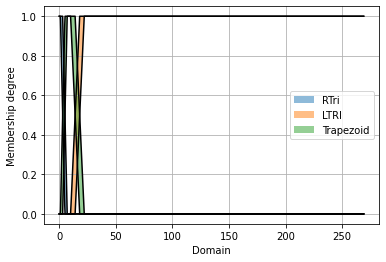

In [67]:
Variance_domain = linspace(0, 269, 1001)
Variance_RTri = IT2FS(Variance_domain, 
             rtri_mf, [7, 3, 1], 
             rtri_mf, [5, 1, 1], check_set=True)
Variance_LTri = IT2FS(Variance_domain, 
             ltri_mf, [10, 18, 1], 
             ltri_mf, [14, 22, 1], check_set=True)
Variance_Trapezoid = IT2FS(Variance_domain, 
                  trapezoid_mf, [1, 5, 14, 22, 1], 
                  trapezoid_mf, [3, 7, 10, 18, 1], check_set=True)

IT2FS_plot(Variance_RTri, Variance_LTri, Variance_Trapezoid, legends=['RTri', 'LTRI', 'Trapezoid'])

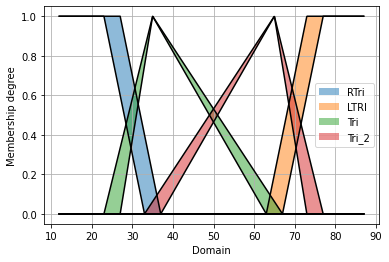

In [66]:
ASTV_domain = linspace(12, 87, 1001)
ASTV_RTri = IT2FS(ASTV_domain, 
             rtri_mf, [37, 27, 1], 
             rtri_mf, [33, 23, 1], check_set=True)
ASTV_Tri = IT2FS(ASTV_domain, 
                 tri_mf, [23, 35, 67, 1], 
                 tri_mf, [27, 35, 63, 1], check_set=True)
ASTV_Tri_2 = IT2FS(ASTV_domain, 
                   tri_mf, [33, 65, 77, 1], 
                   tri_mf, [37, 65, 73, 1], check_set=True) 
ASTV_LTri = IT2FS(ASTV_domain, 
             ltri_mf, [63, 73, 1], 
             ltri_mf, [67, 77, 1], check_set=True)

IT2FS_plot(ASTV_RTri, ASTV_LTri, ASTV_Tri, ASTV_Tri_2, legends=['RTri', 'LTRI', 'Tri', 'Tri_2'])

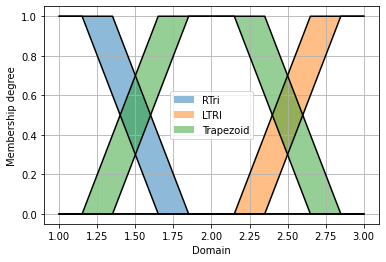

In [71]:
NSP_domain = linspace(1, 3, 1001)
NSP_RTri = IT2FS(NSP_domain, 
             rtri_mf, [1.85, 1.35 , 1], 
             rtri_mf, [1.65, 1.15, 1], check_set=True)
NSP_Trapezoid = IT2FS(NSP_domain, 
                  trapezoid_mf, [1.15, 1.65, 2.35, 2.85, 1], 
                  trapezoid_mf, [1.35, 1.85, 2.15, 2.65, 1], check_set=True)
NSP_LTri = IT2FS(NSP_domain, 
             ltri_mf, [2.15, 2.65, 1], 
             ltri_mf, [2.35, 2.85, 1], check_set=True)

IT2FS_plot(NSP_RTri, NSP_LTri, NSP_Trapezoid, legends=['RTri', 'LTRI', 'Trapezoid'])

In [104]:
# ALTV_RTri, ALTV_Trapezoid, ALTV_LTri
# Variance_RTri,Variance_Trapezoid, Variance_LTri
# ASTV_RTri, ASTV_Tri, ASTV_Tri_2, ASTV_LTri
# NSP_RTri, NSP_Trapezoid, NSP_LTri

In [114]:
myIT2FLS = IT2Mamdani(min_t_norm, max_s_norm, method="Centroid", algorithm="KM")
myIT2FLS.add_input_variable("ALTV")
myIT2FLS.add_input_variable("Variance")
myIT2FLS.add_input_variable("ASTV")
myIT2FLS.add_output_variable("NSP")

myIT2FLS.add_rule([("ASTV", ASTV_Tri)], [("NSP", NSP_RTri)])
myIT2FLS.add_rule([("ASTV", ASTV_RTri)], [("NSP", NSP_RTri)])
myIT2FLS.add_rule([("ASTV", ASTV_Tri_2), ("ALTV", ALTV_RTri)], [("NSP", NSP_RTri)])
myIT2FLS.add_rule([("ASTV", ASTV_LTri), ("ALTV", ALTV_Trapezoid)], [("NSP", NSP_RTri)])
myIT2FLS.add_rule([("ASTV", ASTV_LTri), ("ALTV", ALTV_LTri)], [("NSP", NSP_Trapezoid)])

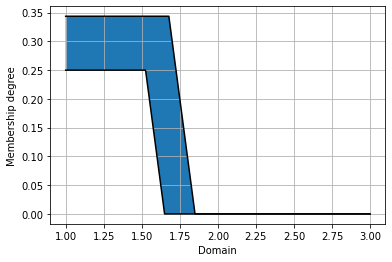

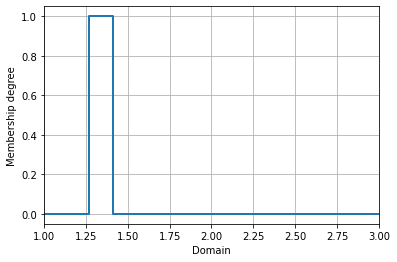

1.3423114621835759


In [118]:
instance = 323

it2out, tr = myIT2FLS.evaluate({"ALTV":df.loc[instance][0],
                                "Variance":df.loc[instance][1],
                                "ASTV":df.loc[instance][2]
})


it2out["NSP"].plot(filename="NSP_out")
TR_plot(NSP_domain, tr["NSP"], filename="NSP_tr")
print(crisp(tr["NSP"]))

In [116]:
correct = 0
ys=[]
for i in range(df.shape[0]):
    it2out, tr = myIT2FLS.evaluate({"ALTV":df.iloc[i][0],
                                    "Variance":df.iloc[i][1],
                                    "ASTV":df.iloc[i][2]
    })
    y = df.iloc[i][3]
    pred = crisp(tr["NSP"])
    pred = np.round(pred)
    if y==pred:
        correct+=1
    ys.append(pred)
correct/df.shape[0]

0.8245531514581373